In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
@njit
def light_intensity(N,a,d,phi,lam):
    u = np.pi*a*np.sin(phi)/lam
    nu = np.pi*d*np.sin(phi)/lam
    return np.sin(u)**2 *np.sin(N*nu)**2/(u**2*nu**2)

In [5]:
N = 4
a = 1e-3
d = 2e-3
lam = 0.59e-3

phi_list = np.arange(np.pi/180*20,np.pi/180*60,0.001)
result = light_intensity(N,a,d,phi_list,lam)

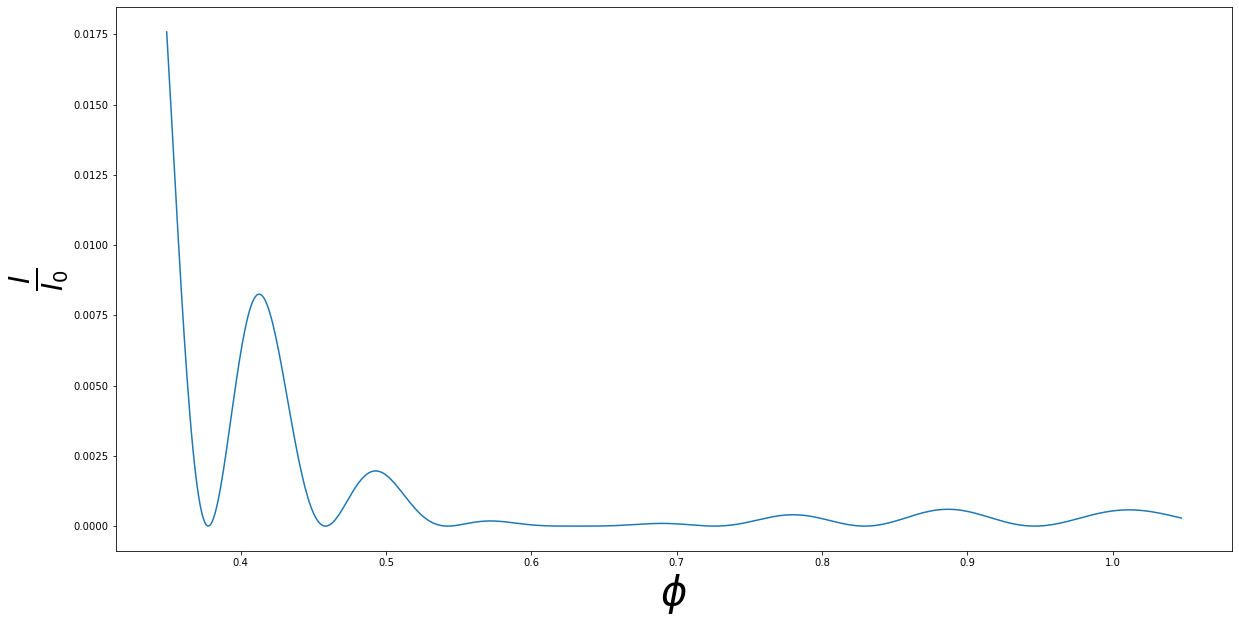

In [6]:
plt.figure(figsize=(20,10))
plt.plot(phi_list, result)
plt.ylabel(r'$\frac{I}{I_0}$',fontsize=40)
plt.xlabel(r'$\phi$',fontsize=40)
plt.show()

In [21]:
@njit
def wavfun1(omega1,A,t):
    return 2*A*np.cos(omega1*t)

@njit
def wavfun2(omega2,A,t):
    return 2*A*np.cos(omega2*t)

@njit
def wavfun3(omega1,omega2,A,t):
#     return 2*A*np.cos(omega1*t)+2*A*np.cos(omega2*t)
    return 2*A*np.cos((omega2-omega1)*t/2)*np.cos((omega2+omega1)/2*t)

In [22]:
t_list = np.arange(0,8,0.01)
result1 = wavfun1(10,1,t_list)
result2 = wavfun2(11,1,t_list)
result3 = wavfun3(10,11,1,t_list)

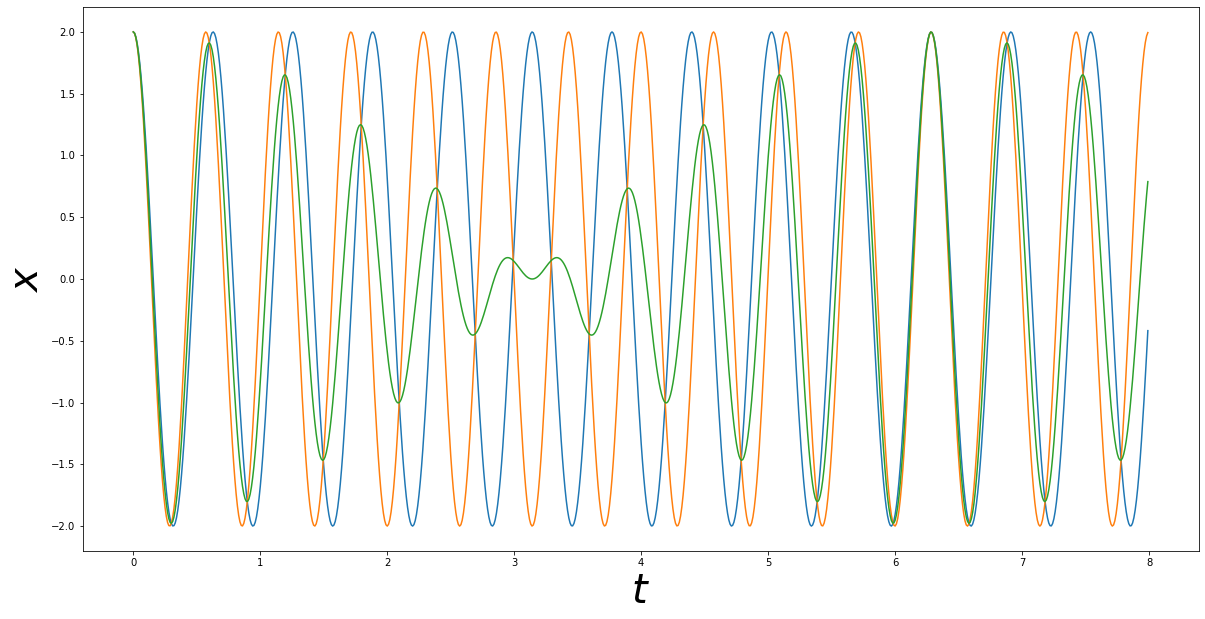

In [23]:
plt.figure(figsize=(20,10))
plt.plot(t_list, result1)
plt.plot(t_list, result2)
plt.plot(t_list, result3)
plt.ylabel(r'$x$',fontsize=40)
plt.xlabel(r'$t$',fontsize=40)
plt.show()